# Preprocessing Weather data
This script formats the weather dataset considering indexing, datetime and time shift between time zones

In [1]:
import pandas as pd
import os
from datetime import timedelta

In [2]:
#Get weather data
cwd = os.path.normpath(os.path.dirname(os.path.dirname(os.getcwd())))
df = pd.read_csv(cwd+'/0raw_data/2010-2013 Weather data meteostat.csv') #df = pd.read_csv('user5.csv')

#Preprocess
df = df.reset_index()

df['time'] = pd.to_datetime(df['time']) + timedelta(hours=10)
df = df.set_index('time')

# Resample to 1-hour interval and forward fill missing values
df_resampled = df.resample('1H').ffill()

# Reset the index to make the time column a regular column again
df_resampled = df_resampled.reset_index()
df_resampled.drop(columns=["index"], inplace=True)

In [3]:
df_resampled.head(2)

,time,temp,dwpt,rhum,wdir,wspd,pres
0,2010-06-30 12:00:00,13.6,1.2,43.0,330.0,5.4,1019.4
1,2010-06-30 13:00:00,13.6,1.2,43.0,330.0,5.4,1019.4


In [4]:
df_resampled.tail(2)

,time,temp,dwpt,rhum,wdir,wspd,pres
26324,2013-07-01 08:00:00,3.9,3.8,99.0,160.0,7.6,1024.0
26325,2013-07-01 09:00:00,8.7,7.9,95.0,160.0,5.4,1024.7


In [5]:
# Matching timeseries with the load dataset. 
weather_sliced = df_resampled[12:-10] 
print(weather_sliced.shape)

#Describe 
display(weather_sliced.describe().transpose(),weather_sliced.head())

(26304, 7)


,count,mean,min,25%,50%,75%,max,std
time,26304,2011-12-30 23:30:00,2010-07-01 00:00:00,2011-03-31 23:45:00,2011-12-30 23:30:00,2012-09-29 23:15:00,2013-06-30 23:00:00,NaN
temp,26223.0,16.123605,-1.7,11.6,16.3,20.5,42.8,6.648843
dwpt,26211.0,10.203491,-4.7,6.0,10.4,14.6,23.1,5.446615
rhum,26211.0,71.769715,11.0,56.0,75.0,91.0,100.0,20.663764
wdir,19042.0,179.669678,10.0,100.0,180.0,250.0,360.0,94.429986
wspd,26304.0,8.406417,0.0,0.0,7.6,13.0,50.0,7.842841
pres,26301.0,1017.388168,985.3,1012.7,1017.3,1022.2,1038.9,6.920138


,time,temp,dwpt,rhum,wdir,wspd,pres
12,2010-07-01 00:00:00,0.7,-0.6,91.0,160.0,5.4,1022.0
13,2010-07-01 01:00:00,0.7,-0.6,91.0,160.0,5.4,1022.0
14,2010-07-01 02:00:00,0.7,-0.6,91.0,160.0,5.4,1022.0
15,2010-07-01 03:00:00,-0.7,-1.5,94.0,360.0,7.6,1023.0
16,2010-07-01 04:00:00,-0.7,-1.5,94.0,360.0,7.6,1023.0


### Visulaize Data

<Axes: title={'center': 'Sydney Temperatur'}, xlabel='Time', ylabel='°C'>

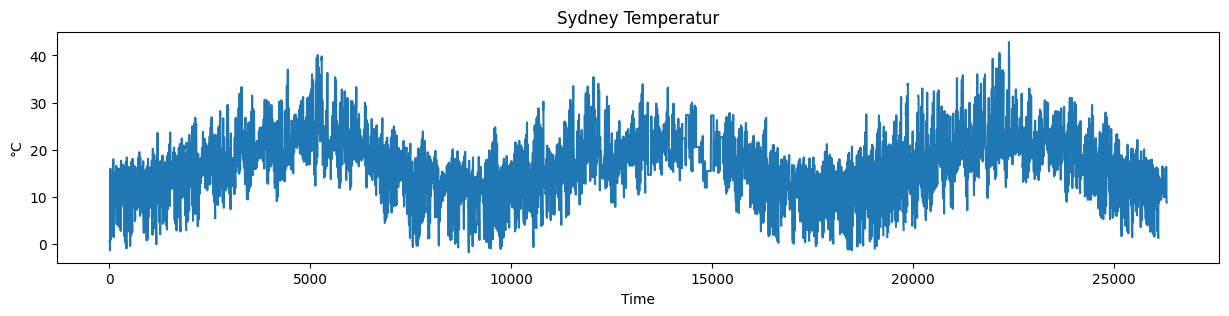

In [6]:
# Visualize Temperature
weather_sliced.temp.plot(title="Sydney Temperatur",
             figsize=(15,3), 
             xlabel="Time", 
             ylabel="°C",
             kind="line"
            )

<Axes: title={'center': 'Relative Humidity'}, xlabel='Time', ylabel='%'>

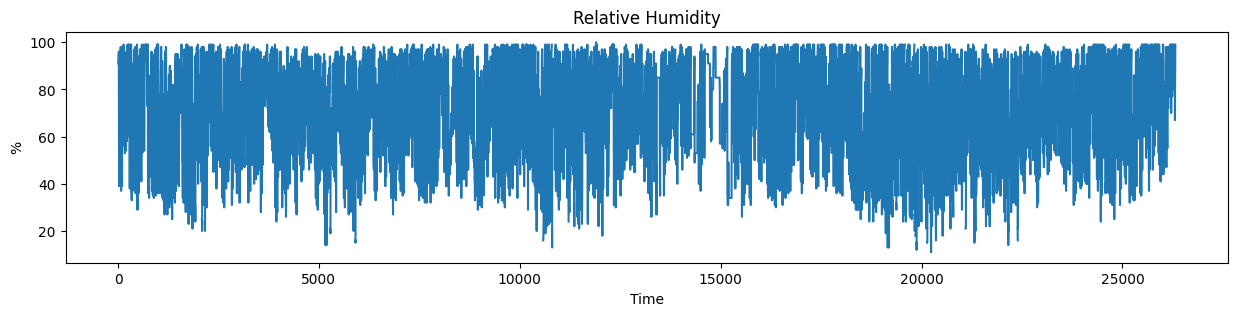

In [7]:
# Visualize Relative Humidity
weather_sliced.rhum.plot(title="Relative Humidity",
             figsize=(15,3), 
             xlabel="Time", 
             ylabel="%",
             kind="line"
            )

In [8]:
weather_sliced

,time,temp,dwpt,rhum,wdir,wspd,pres
12,2010-07-01 00:00:00,0.7,-0.6,91.0,160.0,5.4,1022.0
13,2010-07-01 01:00:00,0.7,-0.6,91.0,160.0,5.4,1022.0
14,2010-07-01 02:00:00,0.7,-0.6,91.0,160.0,5.4,1022.0
15,2010-07-01 03:00:00,-0.7,-1.5,94.0,360.0,7.6,1023.0
16,2010-07-01 04:00:00,-0.7,-1.5,94.0,360.0,7.6,1023.0
...,...,...,...,...,...,...,...
26311,2013-06-30 19:00:00,11.8,9.9,88.0,250.0,3.6,1025.0
26312,2013-06-30 20:00:00,11.8,9.9,88.0,250.0,3.6,1025.0
26313,2013-06-30 21:00:00,8.8,8.7,99.0,30.0,1.8,1025.4
26314,2013-06-30 22:00:00,8.8,8.7,99.0,30.0,1.8,1025.4


In [9]:
#Save the dataframe
weather_sliced.to_csv('../2010-2013 Weather_preprocessed.csv')